<a href="https://colab.research.google.com/github/adminaluru/first-repo/blob/main/ks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTRUCTIONS**

Every learner should submit his/her own homework solutions. However, you are allowed to discuss the homework with each other– but everyone must submit his/her own solution; you may not copy someone else’s solution.

The homework consists of two parts:

    1. Data from our lives
    2. Variable selection

Follow the prompts in the attached jupyter notebook. 

**We are using the same data as for the previous homework**. Use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

Add markdown cells to your analysis to include your solutions, comments, answers. Add as many cells as you need, for easy readability comment when possible. Hopefully this homework will help you develop skills, make you understand the flow of an EDA, get you ready for individual work.

**Note:** This homework has a bonus question, so the highest mark that can be earned is a 105.

Submission: Send in both a ipynb and a pdf file of your work.

Good luck!


# 1. Data from our lives:

### Describe a situation or problem from your job, everyday life, current events, etc., for which a variable selection/feature reduction would be appropriate.

Assume that you have a database of emails and you want to classify (using some machine learning numerical algorithm) each email as spam/not spam. To achieve this goal, you construct a mathematical representation of each email as a bag-of-words vector. This is a binary vector, where each position corresponds to a specific word from an alphabet. For an email, each entry in the bag-of-words vector is the number of times a corresponding word appears in an email (0 if it does not appear at all).

Assume you have constructed a bag-of-words from each email, and as a result you have a sample of bag-of-words vectors x1…. xm. However, not all dimensions (words) of your vectors are informative for the spam/not spam classification. For instance, words “lottery”, “credit”, “pay” would be better features for spam classification than “dog”, “cat”, “tree”. For a mathematical way to reduce dimension we will use Principal Component Analysis(PCA).

# 2. Variable selection

In our class so far we covered three types of feature selection techniques. They were: 
1. Filter methods
2. Wrapper methods
3. Embedded methods

Use the dataset 'auto_imports1.csv' from our previous homework. More specifically, use the version you created called **df2** where you already cleaned, dropped some of the variables and also created the dummy variables.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Read in data
df =pd.read_csv('/content/auto_imports1(1).csv')

df.head()

,fuel_type,body,wheel_base,length,width,heights,curb_weight,engine_type,cylinders,engine_size,bore,stroke,comprassion,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,13495
1,gas,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27,16500
2,gas,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26,16500
3,gas,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.4,10.0,102,5500,24,30,13950
4,gas,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.replace(to_replace='?',value=np.NaN,inplace=True)
df=df.astype({"bore":float, "stroke":float, "horse_power":float, "peak_rpm":float})

In [ ]:
df2=df.drop(['body','engine_type','cylinders'],axis=1)

In [ ]:
df2.dropna(axis = 1, how ='any',inplace=True)

In [ ]:
pd.get_dummies(df2, columns = ['fuel_type'])

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,city_mpg,highway_mpg,price,fuel_type_diesel,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,0,1
1,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,0,1
2,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,0,1
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,0,1
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
196,109.1,188.8,68.9,55.5,2952,141,9.5,23,28,16845,0,1
197,109.1,188.8,68.8,55.5,3049,141,8.7,19,25,19045,0,1
198,109.1,188.8,68.9,55.5,3012,173,8.8,18,23,21485,0,1
199,109.1,188.8,68.9,55.5,3217,145,23.0,26,27,22470,1,0


In [ ]:
df2 = pd.get_dummies(df2, columns = ['fuel_type'], drop_first = True)

In [ ]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     201 non-null    float64
 1   length         201 non-null    float64
 2   width          201 non-null    float64
 3   heights        201 non-null    float64
 4   curb_weight    201 non-null    int64  
 5   engine_size    201 non-null    int64  
 6   comprassion    201 non-null    float64
 7   city_mpg       201 non-null    int64  
 8   highway_mpg    201 non-null    int64  
 9   price          201 non-null    int64  
 10  fuel_type_gas  201 non-null    uint8  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 16.0 KB


### 2.1. Filtered methods

Choose one (you may do more, one is required) of the filtered methods to conduct variable selection. Report your findigs

The filter method ranks each feature based on some uni-variate metric and then selects the highest-ranking features. Some of the uni-variate metrics are

**variance:** removing constant and quasi constant features

**chi-square:** used for classification. It is a statistical test of independence to determine the dependency of two variables.

**correlation coefficients**: removes duplicate features

**Information gain or mutual information:** assess the dependency of the independent variable in predicting the target variable. In other words, it determines the ability of the independent feature to predict the target variable

**Filter criteria for selecting the best feature**

Select independent features with

1.High correlation with the target variable

2.Low correlation with another independent variable

3.Higher information gain or mutual information of the independent variable





In [ ]:
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [ ]:
df2.corr().style.background_gradient(cmap="Blues")

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,city_mpg,highway_mpg,price,fuel_type_gas
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.250313,-0.470606,-0.543304,0.584642,-0.307237
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.159733,-0.665192,-0.698142,0.690628,-0.211187
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.189867,-0.633531,-0.680635,0.751265,-0.244356
heights,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.259737,-0.049800,-0.104812,0.135486,-0.281578
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.156433,-0.749543,-0.794889,0.834415,-0.221046
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.028889,-0.650546,-0.679571,0.872335,-0.070779
comprassion,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,1.000000,0.331425,0.268465,0.071107,-0.985231
city_mpg,-0.470606,-0.665192,-0.633531,-0.049800,-0.749543,-0.650546,0.331425,1.000000,0.972044,-0.686571,-0.265676
highway_mpg,-0.543304,-0.698142,-0.680635,-0.104812,-0.794889,-0.679571,0.268465,0.972044,1.000000,-0.704692,-0.198690
price,0.584642,0.690628,0.751265,0.135486,0.834415,0.872335,0.071107,-0.686571,-0.704692,1.000000,-0.110326


**Applying step 1 of the filter method**

Identify input features having high correlation with target variable.
Here we print the correlation of each of the input feature with the target variable

In [ ]:
importances = df2.drop("price", axis=1).apply(lambda x: x.corr(df2.price))
indices = np.argsort(importances)
print(importances[indices])

highway_mpg     -0.704692
city_mpg        -0.686571
fuel_type_gas   -0.110326
comprassion      0.071107
heights          0.135486
wheel_base       0.584642
length           0.690628
width            0.751265
curb_weight      0.834415
engine_size      0.872335
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

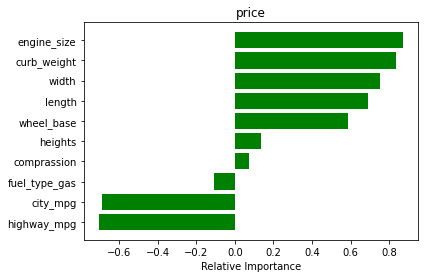

In [ ]:
names=['wheel_base','length','width','heights','curb_weight','engine_size','comprassion','city_mpg','highway_mpg','fuel_type_gas']
plt.title('price')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We want to keep features with only a high correlation with the target variable. This implies that the input feature has a high influence in predicting the target variable.
We set the threshold to the absolute value of 0.4. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4

In [ ]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

wheel_base
length
width
curb_weight
engine_size
city_mpg
highway_mpg


We now have reduced the input features from 10 to 7. heights,comprassion,fuel_type_gas was dropped as it was not having a high correlation with price


**Applying step 2 of the filter method**

Identify input features that have a low correlation with other independent variables.

Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features.
We will keep input features that are not highly correlated with other input features

In [ ]:
X=df2[['wheel_base','length','width','curb_weight','engine_size','city_mpg','highway_mpg']]

In [ ]:
len(X.columns)

7

In [ ]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

wheel_base  is highly  correlated  with  length
wheel_base  is highly  correlated  with  width
wheel_base  is highly  correlated  with  curb_weight
length  is highly  correlated  with  wheel_base
length  is highly  correlated  with  width
length  is highly  correlated  with  curb_weight
width  is highly  correlated  with  wheel_base
width  is highly  correlated  with  length
width  is highly  correlated  with  curb_weight
curb_weight  is highly  correlated  with  wheel_base
curb_weight  is highly  correlated  with  length
curb_weight  is highly  correlated  with  width
curb_weight  is highly  correlated  with  engine_size
curb_weight  is highly  correlated  with  highway_mpg
engine_size  is highly  correlated  with  curb_weight
city_mpg  is highly  correlated  with  highway_mpg
highway_mpg  is highly  correlated  with  curb_weight
highway_mpg  is highly  correlated  with  city_mpg


wheel_base, length, width, curb_weight are highly correlated. We will keep only keep one of them.

Based on the above result we keep wheel_base, engine_size, city_mpg, highway_mpg and remove length, width, curb_weight

**Applying step 3 of the filter method**

Find the information gain or mutual information of the independent variable with respect to a target variable

In [ ]:
X1=df2[['wheel_base','engine_size','city_mpg','highway_mpg']]

In [ ]:
y1=df2[['price']]

In [ ]:
mi = mutual_info_regression(X1, y1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X1.columns
mi.sort_values(ascending=False)

highway_mpg    0.863974
engine_size    0.825623
city_mpg       0.743147
wheel_base     0.584690
dtype: float64

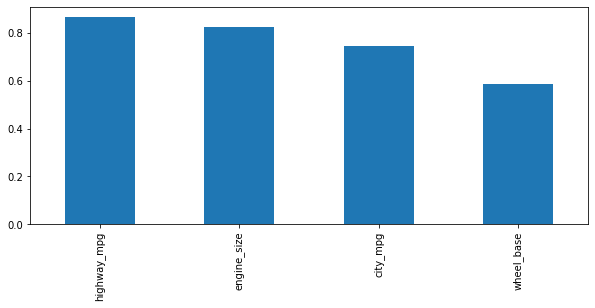

In [ ]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

We now have our feature importance to predict the **Price**. **Price** can be predicted based on the 'wheel_base','engine_size','city_mpg','highway_mpg' features


### 2.2. Wrapper methods

Choose one (you may do more, one is required) of the wrapper methods to conduct variable selection. Report your findigs.

In wrapper methods, the feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.

It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion

Most commonly used techniques under wrapper methods are:

1.Forward selection

2.Backward elimination

3.Bi-directional elimination(Stepwise Selection)

**Forward Selection — SFS() from mlxtend**

In short, the steps for the forward selection technique are as follows :

1.Choose a significance level (e.g. SL = 0.05 with a 95% confidence).

2.Fit all possible simple regression models by considering one feature at a time. Total ’n’ models are possible. Select the feature with the lowest p-value.

3.Fit all possible models with one extra feature added to the previously selected feature(s).

4.Again, select the feature with a minimum p-value. if p_value < significance level then go to Step 3, otherwise terminate the process.

In [ ]:
pip install mlxtend

In [ ]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [ ]:
df2.head()

,wheel_base,length,width,heights,curb_weight,engine_size,comprassion,city_mpg,highway_mpg,price,fuel_type_gas
0,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,13495,1
1,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500,1
2,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500,1
3,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950,1
4,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,17450,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   wheel_base     201 non-null    float64
 1   length         201 non-null    float64
 2   width          201 non-null    float64
 3   heights        201 non-null    float64
 4   curb_weight    201 non-null    int64  
 5   engine_size    201 non-null    int64  
 6   comprassion    201 non-null    float64
 7   city_mpg       201 non-null    int64  
 8   highway_mpg    201 non-null    int64  
 9   price          201 non-null    int64  
 10  fuel_type_gas  201 non-null    uint8  
dtypes: float64(5), int64(5), uint8(1)
memory usage: 16.0 KB


In [ ]:
K=df2[['wheel_base','length','width','heights','curb_weight','engine_size','comprassion','city_mpg','highway_mpg','fuel_type_gas']]
K1=df2[['price']]

In [ ]:
#Define Sequential Forward Selection (sfs)
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
#Use SFS to select the top 5 features 
sfs.fit(K,K1)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=10,
                          scoring='r2')

In [ ]:
#Create a dataframe for the SFS results 
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(5,)",[0.7609686443622008],0.760969,"(engine_size,)"
2,"(4, 5)",[0.7924548499107636],0.792455,"(curb_weight, engine_size)"
3,"(4, 5, 7)",[0.7988383571740652],0.798838,"(curb_weight, engine_size, city_mpg)"
4,"(4, 5, 6, 7)",[0.8050822221550307],0.805082,"(curb_weight, engine_size, comprassion, city_mpg)"
5,"(2, 4, 5, 6, 7)",[0.8086801733866978],0.80868,"(width, curb_weight, engine_size, comprassion,..."
6,"(2, 4, 5, 6, 7, 9)",[0.8113207777077613],0.811321,"(width, curb_weight, engine_size, comprassion,..."
7,"(1, 2, 4, 5, 6, 7, 9)",[0.8144470967461455],0.814447,"(length, width, curb_weight, engine_size, comp..."
8,"(1, 2, 3, 4, 5, 6, 7, 9)",[0.8163053071238339],0.816305,"(length, width, heights, curb_weight, engine_s..."
9,"(1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.8176694433267117],0.817669,"(length, width, heights, curb_weight, engine_s..."
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.8176736882452219],0.817674,"(wheel_base, length, width, heights, curb_weig..."


We now have our feature importance to predict the Price. Price can be predicted based on the 'curb_weight','engine_size' features

### 2.3. Embedded methods

Choose one (you may do more, one is required) of the embedded methods to conduct variable selection. Report your findigs.

**Embedded methods** combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting

In [ ]:
R=df2[['wheel_base','length','width','heights','curb_weight','engine_size','comprassion','city_mpg','highway_mpg','fuel_type_gas']]
R1=df2['price']

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=1.0)
# fit model
model.fit(R, R1)
print(model.coef_)

[-1.61690665e+01 -1.19560924e+02  7.29127293e+02  2.05670811e+02
  2.10810634e+00  1.15039427e+02  4.14801653e+02 -5.14585690e+02
  2.15684017e+02  2.93023064e+03]


### 2.4. Compare your results
Compare your results from the three methods and also compare the coefficients to the full linear regression model (model1) from the previous homework.

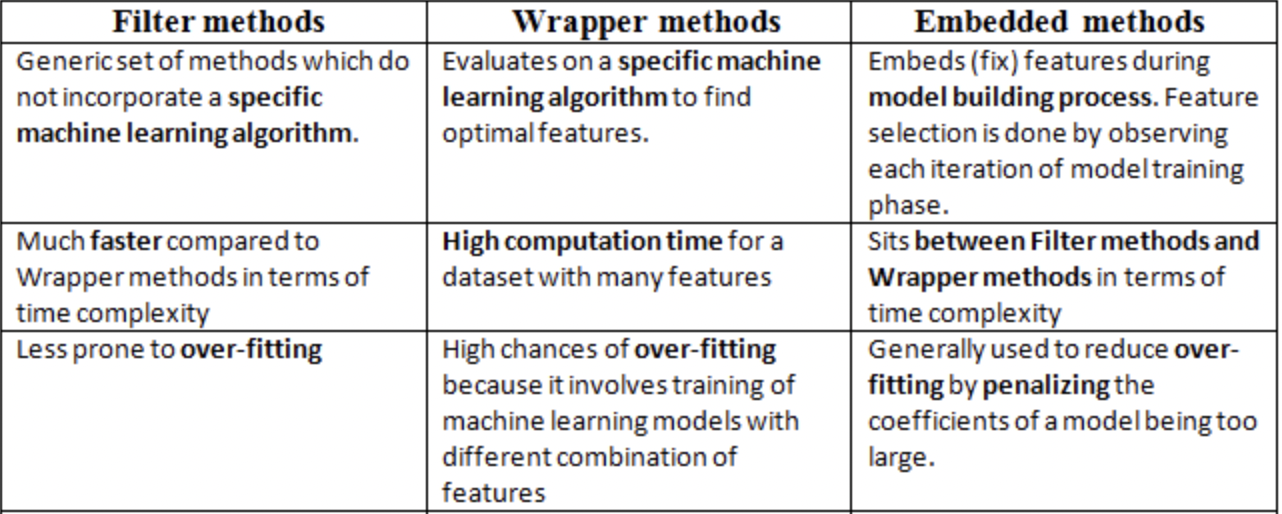

the coefficients to the full linear regression model (model1) from the previous homework is 
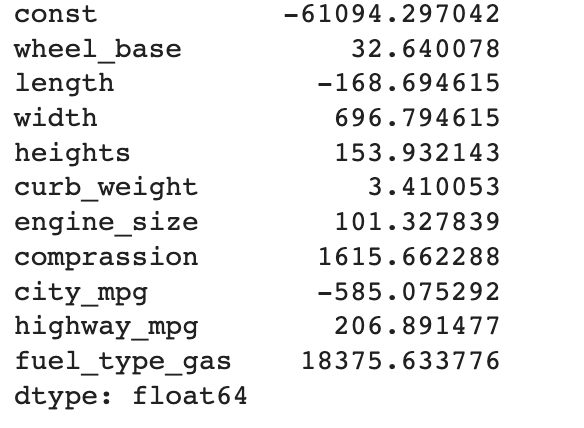

From the above feature selection anlaysis which includes correlation analysis from filter methods, forward selection from wrapper methods and ridge regression from embedded methods says that curb_weight and engine_size are the required features to predict price

### 2.5 Bonus question (*extra 5 points*)

Reduce your features with PCA. Run a regression with the chosen number of PCA's, report your findings.

PCA is an unsupervised linear dimensionality reduction and data visualization technique for very high dimensional data. As having
high dimensional data is very hard to gain insights from adding to that, it is very computationally intensive. The main idea behind this
technique is to reduce the dimensionality of data that is highly correlated by transforming the original set of vectors to a new set
which is known as Principal component. PCA tries to preserve the Global Structure of data i.e when converting d-dimensional data to
dʼ-dimensional data then it tries to map all the clusters as a whole due to which local structures might get lost. Application of this
technique includes Noise filtering, feature extractions, stock market predictions, and gene data analysis.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df2)
scaled_data = scaler.transform(df2)
scaled_data

array([[-1.6851071 , -0.43940949, -0.85346024, ..., -0.54228772,
         0.03631396,  0.33241125],
       [-1.6851071 , -0.43940949, -0.85346024, ..., -0.54228772,
         0.41538505,  0.33241125],
       [-0.71010295, -0.24415236, -0.18559675, ..., -0.689386  ,
         0.41538505,  0.33241125],
       ...,
       [ 1.70261919,  1.18773324,  1.43635744, ..., -1.13068086,
         1.04422678,  0.33241125],
       [ 1.70261919,  1.18773324,  1.43635744, ..., -0.54228772,
         1.16848137, -3.00832179],
       [ 1.70261919,  1.18773324,  1.43635744, ..., -0.83648429,
         1.18803412,  0.33241125]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = MinMaxScaler()
## fit the data on the scaler object
scaled_df = scaler.fit_transform(df2)
## view the first 5 rows of the scaled_features array
scaled_df[0:5]

array([[0.05830904, 0.41343284, 0.32478632, 0.08333333, 0.41117145,
        0.26037736, 0.125     , 0.22222222, 0.28947368, 0.20795889,
        1.        ],
       [0.05830904, 0.41343284, 0.32478632, 0.08333333, 0.41117145,
        0.26037736, 0.125     , 0.22222222, 0.28947368, 0.28255797,
        1.        ],
       [0.2303207 , 0.44925373, 0.44444444, 0.38333333, 0.51784329,
        0.34339623, 0.125     , 0.16666667, 0.26315789, 0.28255797,
        1.        ],
       [0.38483965, 0.52985075, 0.5042735 , 0.54166667, 0.32932506,
        0.18113208, 0.1875    , 0.30555556, 0.36842105, 0.21925426,
        1.        ],
       [0.37317784, 0.52985075, 0.52136752, 0.54166667, 0.51823119,
        0.28301887, 0.0625    , 0.13888889, 0.15789474, 0.3061417 ,
        1.        ]])

In [ ]:
## create a PCA
pca = PCA()
## generate the principal components
pca.fit(scaled_df)

PCA()

In [ ]:
## check the variance ratio
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.472502
1,0.349162
2,0.092406
3,0.029757
4,0.024056
5,0.010381
6,0.007675
7,0.006852
8,0.004051
9,0.001754


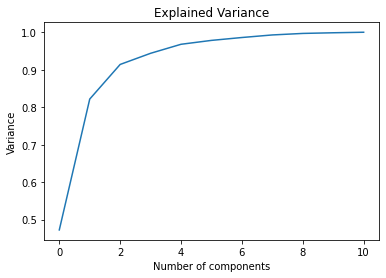

In [ ]:
## plot for visulization
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show()

In [ ]:
## create PCA with specific number of components
pca = PCA(n_components = 9)

In [ ]:
## Generate the principal components
pca.fit(scaled_df)
## transform the training set into principal components
scaled_df_x = pca.transform(scaled_df)

In [ ]:
## since array is created again convert it back to dataframe
scaled_df_x = pd.DataFrame(scaled_df_x)

In [ ]:
scaled_df_x.head()

,0,1,2,3,4,5,6,7,8
0,-0.239940,-0.202518,0.436817,-0.128819,0.092281,-0.068641,0.016140,-0.085619,0.025397
1,-0.213957,-0.212501,0.456458,-0.089263,0.118543,-0.035033,-0.010021,-0.100172,0.035057
2,0.041905,-0.231151,0.190715,-0.047755,0.136822,-0.043020,0.044063,0.010020,0.019397
3,-0.020902,-0.072093,-0.082144,-0.021515,-0.012383,0.088588,-0.034851,-0.048051,-0.043742
4,0.191593,-0.291132,0.001297,-0.102319,0.117145,0.031766,-0.005721,0.036637,0.009166


**Regression Modelling**

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [ ]:
X = scaled_df_x.values
X = sm.add_constant(X,has_constant = 'add')
y1=df2['price']
model = sm.OLS(y1,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.165e+05
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        02:44:05   Log-Likelihood:                -1162.1
No. Observations:                 201   AIC:                             2344.
Df Residuals:                     191   BIC:                             2377.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.321e+04      5.678   2325.822      0.000    1.32e+04    1.32e+04
x1          1.403e+04     12.218   1148.330      0.000     1.4e+04    1.41e+04
x2         -5390.8062     14.213   -379.288      0.000   -5418.841   -5362.772
x3          1.061e+04     27.628    383.866      0.000    1.06e+04    1.07e+04
x4          2.136e+04     48.686    438.722      0.000    2.13e+04    2.15e+04
x5          1.418e+04     54.148    261.891      0.000    1.41e+04    1.43e+04
x6          1.815e+04     82.428    220.161      0.000     1.8e+04    1.83e+04
x7         -1.413e+04     95.864   -147.355      0.000   -1.43e+04   -1.39e+04
x8         -7858.3865    101.460    -77.453      0.000   -8058.512   -7658.261
x9          5216.3064    131.953     39.532      0.000    4956.034    5476.579
==============================================================================
Omnibus:                        4.924   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                5.176
Skew:                           0.230   Prob(JB):                       0.0752
Kurtosis:                       3.637   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""